# 1
### a Find a linear regression model that relates the living area to the selling price. If you did any data cleaning step(s), describe and explain why you did that.
We removed datapoint that did not have both a selling price and a living area since these entries would be impossible to plot. Every other NaN was replaced with a 0.

See below for a linear regression

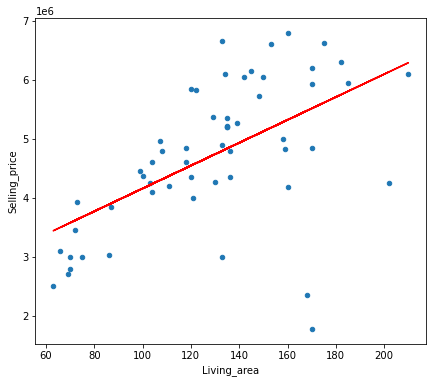

In [51]:
#a
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

plt.rcParams['figure.figsize'] = [1*7, 1*6] #Resize figure to allow 2 subplots in x 

houses = pd.read_csv("data_assignment2.csv").set_index('ID')

#Clean NaN
houses = houses.dropna(subset=['Living_area','Selling_price'])
houses = houses.fillna(0)

living_area = houses.Living_area.values.reshape(-1, 1)  
selling_price = houses.Selling_price.values.reshape(-1, 1)
linear_regressor = LinearRegression()  
linear_regressor.fit(living_area, selling_price)  
selling_price_pred = linear_regressor.predict(living_area)


houses.plot.scatter(x='Living_area', y='Selling_price')
plt.plot(living_area, selling_price_pred, color='red')
plt.show()

### b  What are the values of the slope and intercept of the regression line?

In [13]:
print(f"Intercept: {linear_regressor.intercept_[0]}")

Intercept: 2220603.243355869


In [14]:
print(f"Slope: {linear_regressor.coef_[0][0]}")

Slope: 19370.13854733158


### c Use this model to predict the selling prices of houses which have living area 100 m2, 150 m2 and 200 m2

In [29]:
print(f"100: {linear_regressor.predict([[100]])[0][0]}\n150: {linear_regressor.predict([[150]])[0][0]}\n200: {linear_regressor.predict([[200]])[0][0]}")

100: 4157617.0980890268
150: 5126124.025455605
200: 6094630.952822184


### d Draw a residual plot.

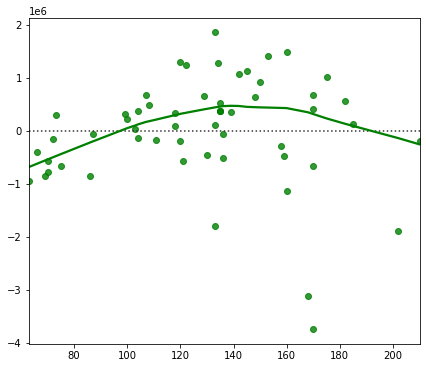

In [52]:
import seaborn as sns

# Plot the residuals after fitting a linear model
sns.residplot(x=X, y=Y, lowess=True, color="g")
plt.show()

### e Discuss the results, and how the model could be improved
We see from the first scatterplot that there is alot of variance in the data and therefor it will be impossible to find a perfect fit regardled of the typ of curve. But we see that there is some correlation between selling price and living area. Intuatively this makes sence, when selling a house there is many more variables to take into account like the state of the house, how big the land is or the age of the house. 

But for the residual plot we can see that there is a quadratic trend to the data hence the model migth be improved by adding a quadratic term.

In [32]:
#Print correlation between variables
houses.corr()

,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
Living_area,1.000000,0.778441,-0.054219,-0.351062,-0.422667,0.561956
Rooms,0.778441,1.000000,-0.175584,-0.165530,-0.315432,0.499236
Land_size,-0.054219,-0.175584,1.000000,0.298340,0.455108,-0.037107
Biarea,-0.351062,-0.165530,0.298340,1.000000,0.408238,-0.224450
Age,-0.422667,-0.315432,0.455108,0.408238,1.000000,-0.481619
Selling_price,0.561956,0.499236,-0.037107,-0.224450,-0.481619,1.000000


# 2 Iris data set

### a Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set

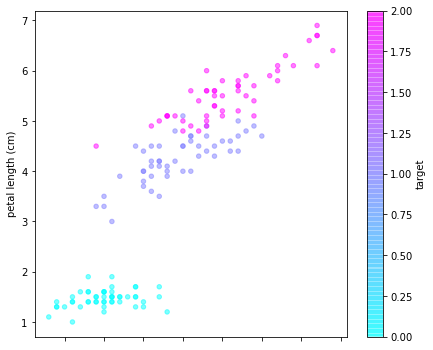

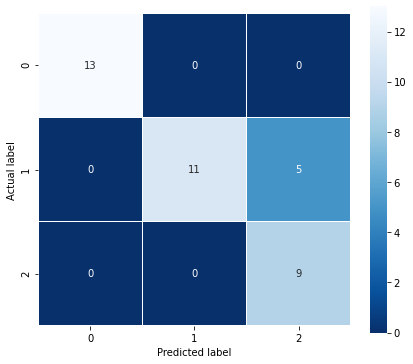

In [61]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

iris = load_iris() 
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])

iris_df.plot.scatter(x="sepal length (cm)",y="petal length (cm)", c="target", cmap="cool", alpha=0.5)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

logisticRegr = LogisticRegression(multi_class='ovr', solver='liblinear')

logisticRegr.fit(x_train, y_train)

pred = logisticRegr.predict(x_test)

cm_logr = metrics.confusion_matrix(y_test, pred)

sns.heatmap(cm_logr, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

### b Use k-nearest neighbours to classify the iris data set with some different values for k, and with uniform and distance-based weights. What will happen when k grows larger for the different cases? Why?

(TODO!!!!)

See below plot. 

When k increases we see that the classifier deteriorates for the uniform weights but with distance weights the model will not deteriorate when k increases. This makes sence since when k increses each point will be compared to more neigbours increasing the chanse for a missclassification (TODO utveckla) and when k approches the data set size everything will be classified as the largest cluster. But with disance weight this is not the case since each point not only is compared its neighbors but the comparison is weighted to give more emphasis to close neightbours. 

In this data set this resulted in that the classifier did not deteriorate. 

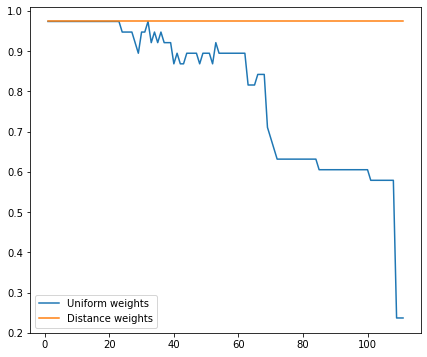

In [55]:
from sklearn.neighbors import KNeighborsClassifier

scores = []
for k in range(1,len(x_train)):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(range(1,len(x_train)),scores, label="Uniform weights")


scores2 = []
for k in range(1,len(x_train)):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance")

    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    scores2.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(range(1,len(x_train)),scores2, label="Distance weights")
plt.legend()
plt.show()

### c. Compare the classification models for the iris data set that are generated by k-nearest neighbours (for the different settings from question 3) and by logistic regression. Calculate confusion matrices for these models and discuss the performance of the various models.
For the knn classifier we will use uniform weights with k=1 since we show that is one of the best configurations of the paramaters for this data set. Kommer vara sämre om man väljer annat

From the confusion matrixes below it can be concluded that the knn classifier works better for this data set. 

(Utöka lite)

Snacka om att bara för att det är så denna gång behöver det inte alltid vara så att KNN är bättre

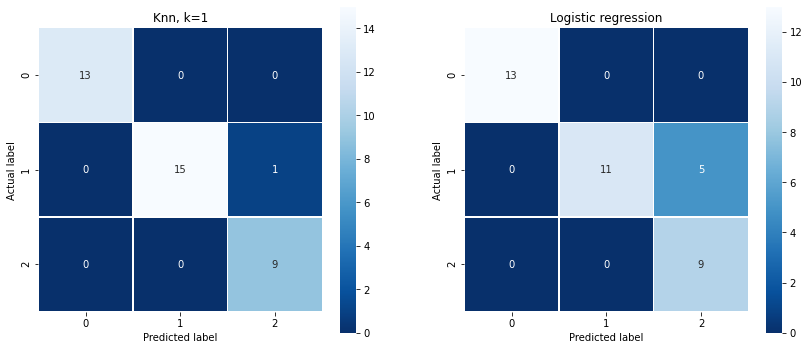

In [71]:
knn = KNeighborsClassifier(n_neighbors=1) 

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

cm_knn = metrics.confusion_matrix(y_test, y_pred)


plt.rcParams['figure.figsize'] = [2*7, 1*6] #Resize figure to allow 2 subplots in x 

fig, (ax1,ax2) = plt.subplots(1,2)
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax1);
sns.heatmap(cm_logr, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax2);

ax1.set_ylabel('Actual label');
ax1.set_xlabel('Predicted label');
ax1.set_title("Knn, k=1")
ax2.set_ylabel('Actual label');
ax2.set_xlabel('Predicted label');
ax2.set_title("Logistic regression")

plt.show()

# 3 Explain why it is important to use a separate test (and sometimes validation) set

Otherwise it would be easy for the model to overfit for the data and just "memorise" all input and not actually learn to predic new values. 

(ordbajsa lite här också)